# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [57]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
table_rows = soup.find_all('table', class_ = 'table')
#check length of list
len(table_rows)
#use 0 index since theres only one item in the list
table_rows = table_rows[0]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
mars_list= []
#
#  Loop through the scraped data to create a list of rows
# for row in table_rows.find_all('tr'):
#     table_data = [td.text for td in row.find_all('td')]
#     mars_list.append(table_data)

#using list comprehension
mars = [[td.text for td in row.find_all('td')]for row in table_rows.find_all('tr')]

#get the headers
headers = [header.text.strip() for header in table_rows.find('tr').find_all('th')]

In [8]:
#check list to see if all data is there
mars


[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-7

In [9]:
#check list of headers to see if all data is there
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame by using the list of rows and a list of the column names


In [10]:
mars_df = pd.DataFrame(mars, columns=headers)
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


In [11]:
#drop first row of data since its null
mars_df = mars_df.iloc[1:]

In [12]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
# Change data types for data analysis
mars_df['terrestrial_date '] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [15]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes


id                           object
terrestrial_date             object
sol                           int64
ls                            int64
month                         int64
min_temp                    float64
pressure                    float64
terrestrial_date     datetime64[ns]
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
# 1. How many months are there on Mars?
num_months = mars_df.groupby(['month'])['month'].count()
num_months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [24]:
# 2. How many Martian days' worth of data are there?
num_days = mars_df['id'].count()
num_days

1867

In [30]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_df.groupby(['month'])['min_temp'].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

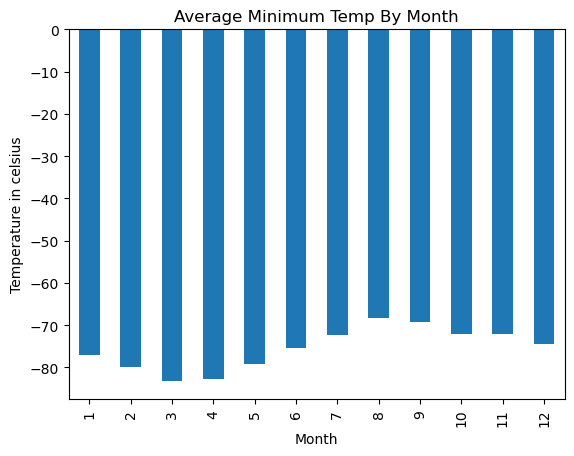

In [74]:
# Plot the average temperature by month
avg_low_temp.plot.bar()
plt.ylabel('Temperature in celsius')
plt.xlabel('Month')
plt.title('Average Minimum Temp By Month')
plt.show()


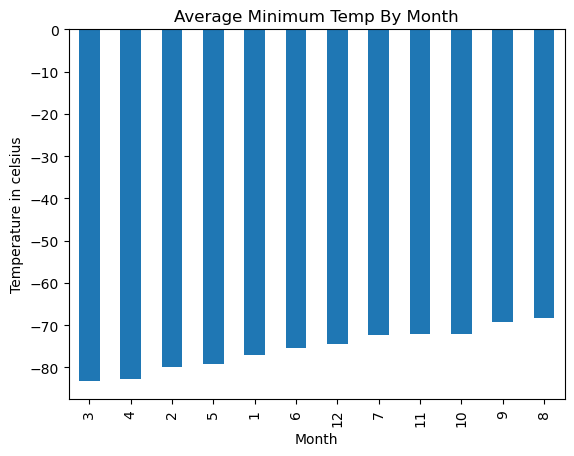

In [73]:
# Identify the coldest and hottest months in Curiosity's location
sorted_avg_low_temp=avg_low_temp.sort_values()
sorted_avg_low_temp.plot.bar()
plt.ylabel('Temperature in celsius')
plt.xlabel('Month')
plt.title('Average Minimum Temp By Month')
plt.show()


# Fig.1

In [42]:
# 4. Average pressure by Martian month
avg_pressure=mars_df.groupby(['month'])['pressure'].mean()
avg_pressure


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

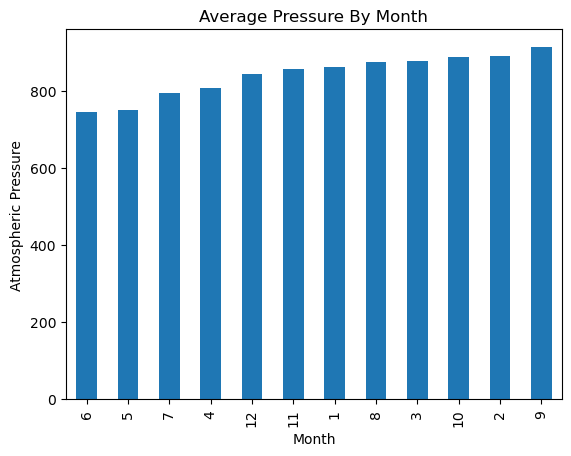

In [75]:
# Plot the average pressure by month
sorted_avg_pressure = avg_pressure.sort_values()
sorted_avg_pressure.plot.bar()
plt.ylabel('Atmospheric Pressure')
plt.xlabel('Month')
plt.title('Average Pressure By Month')
plt.show()

# Fig. 2

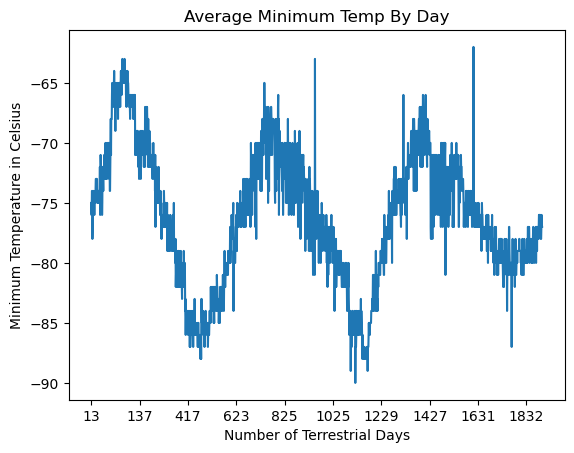

In [77]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# mars_df.plot(x = 'id',y = 'min_temp')
# plt.xlabel('Number of Terrestrial Days')
# plt.ylabel('Minimum Temperature in Celsius')
# plt.show()
x = mars_df['id']
y = mars_df['min_temp']
plt.plot(x,y)
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature in Celsius')
xticks_positions = np.arange(1, len(mars_df['id']), 200 )
plt.xticks(xticks_positions)
plt.title('Average Minimum Temp By Day')
plt.show()


# Fig. 3

Based on figure 1 From above month 3 is the lowest minimum temperature on mars on average and month 8 is the highest minimum temperature on average. When comparing these to earths temperature these are very cold. 



When looking at atmospehric pressure on Mars on average month 6 is the lowest and month 9 is the highest this is based on analyzing Fig 2. from above.

Looking at Fig. 3 we can see that two peaks or about a year on Mars exist at 800 and at 125 meaning that we can esitmate that (800 - 125 = 675) 675 terrestrial days is about one year on Mars. I used chat gpt to confirm that there is about 687 days on mars.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [68]:
# Write the data to a CSV
mars_df_to_csv = mars_df.to_csv('mars_weather_data.csv')
mars_df_to_csv

In [78]:
# quit browsing
browser.quit()